<a href="https://colab.research.google.com/github/naokityokoyama/Machine_Learning/blob/master/Kmeans_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmo Não Supervisionado - Kmeans

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv')

In [3]:
filmes.columns = ['Filmes', 'Titulo', 'Generos']

In [4]:
filmes

,Filmes,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
filmes['Generos'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

## Dummy

pandas ja cria uma tabela dummy 

In [6]:
generos = filmes.Generos.str.get_dummies()


## Concat

In [7]:
 filmes = pd.concat([filmes, generos], axis=1)
 filmes.head()

,Filmes,Titulo,Generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Escalar dados 

In [8]:
#colocando 'peso' nos dados 
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos) #dataset dummy generos 
generos_escalados.shape

(9742, 20)

## Kmeans 

In [9]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(generos_escalados)

print (f'Grupos {kmeans.labels_}')

Grupos [2 2 1 ... 1 2 1]


In [10]:
print (generos.columns)
print (kmeans.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.50311199  0.01817988 -0.23400019 -0.2674834  -0.60234539
   0.48823    -0.21568861 -0.15719486 -0.07972202  0.238985    0.72992176
   0.12029621 -0.1781427   0.47162652 -0.34058195  0.46872987  1.26071225
  -0.11917104 -0.06291882]
 [ 0.03533334 -0.21901753 -0.15218333 -0.25259387 -0.27045122  0.23009714
  -0.16405215  0.12669424  0.16264441 -0.10805096 -0.08969801 -0.27623182
  -0.10503622  0.0187975  -0.18588492  0.19252019 -0.22652299 -0.47800338
   0.07923053  0.04096061]
 [-0.05917995 -0.00962244  0.90878645  2.23816024  2.443185    0.21392461
  -0.31488521 -0.20256563 -0.59069409  0.90112351 -0.09492563 -0.27561643
   0.32959593  0.37364544 -0.13143727 -0.27237294  0.13265141 -0.47037595
 

In [11]:
grupos = pd.DataFrame(kmeans.cluster_centers_, columns=generos.columns)

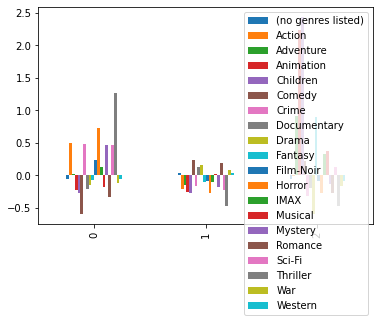

In [12]:
grupos.plot.bar()

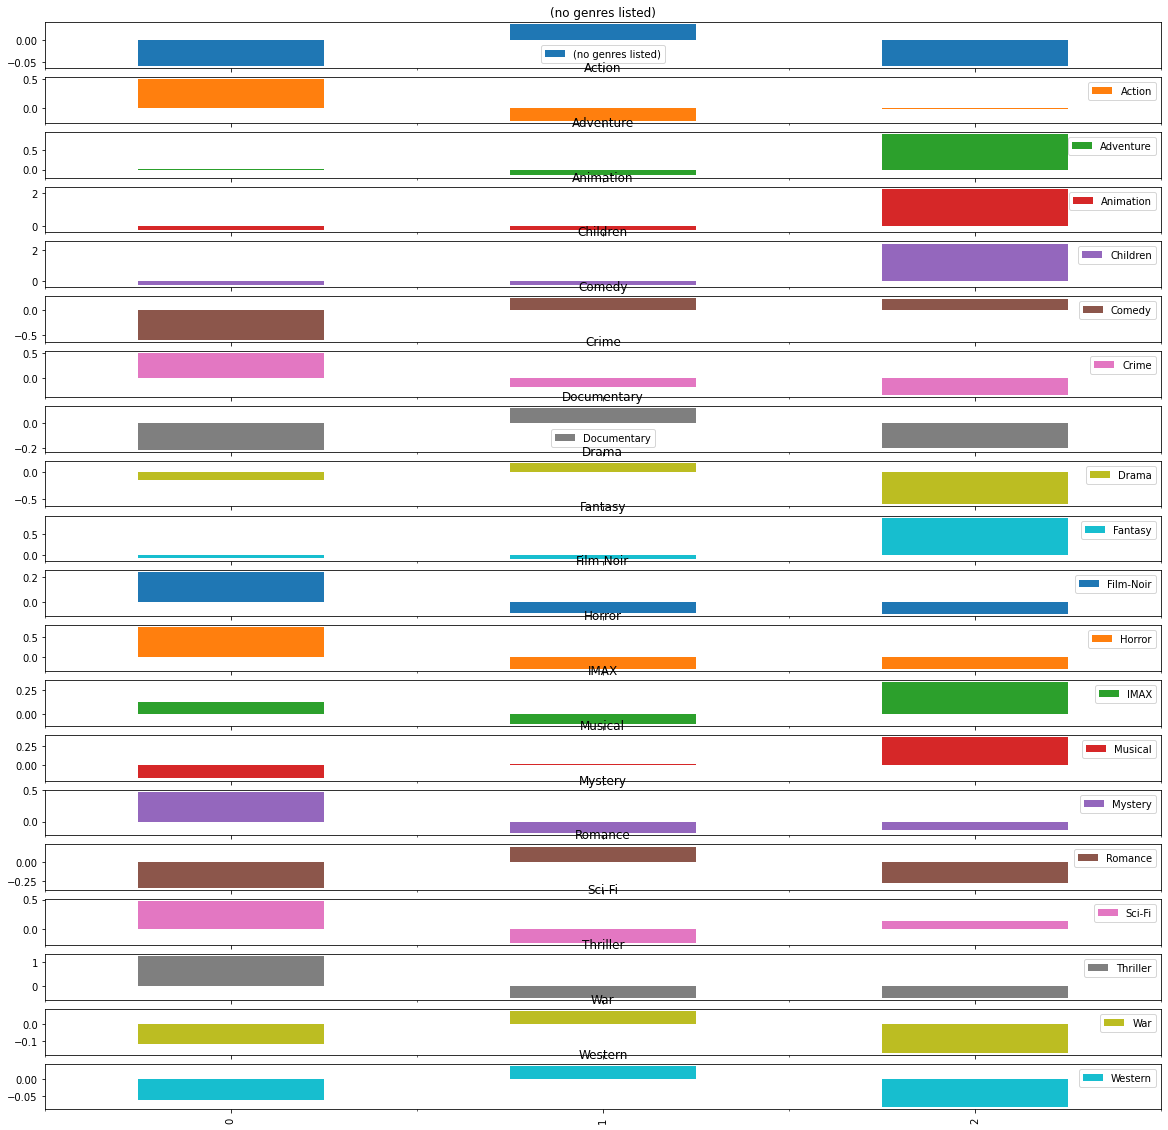

In [13]:
grupos.plot.bar(subplots=True, figsize=(20,20));

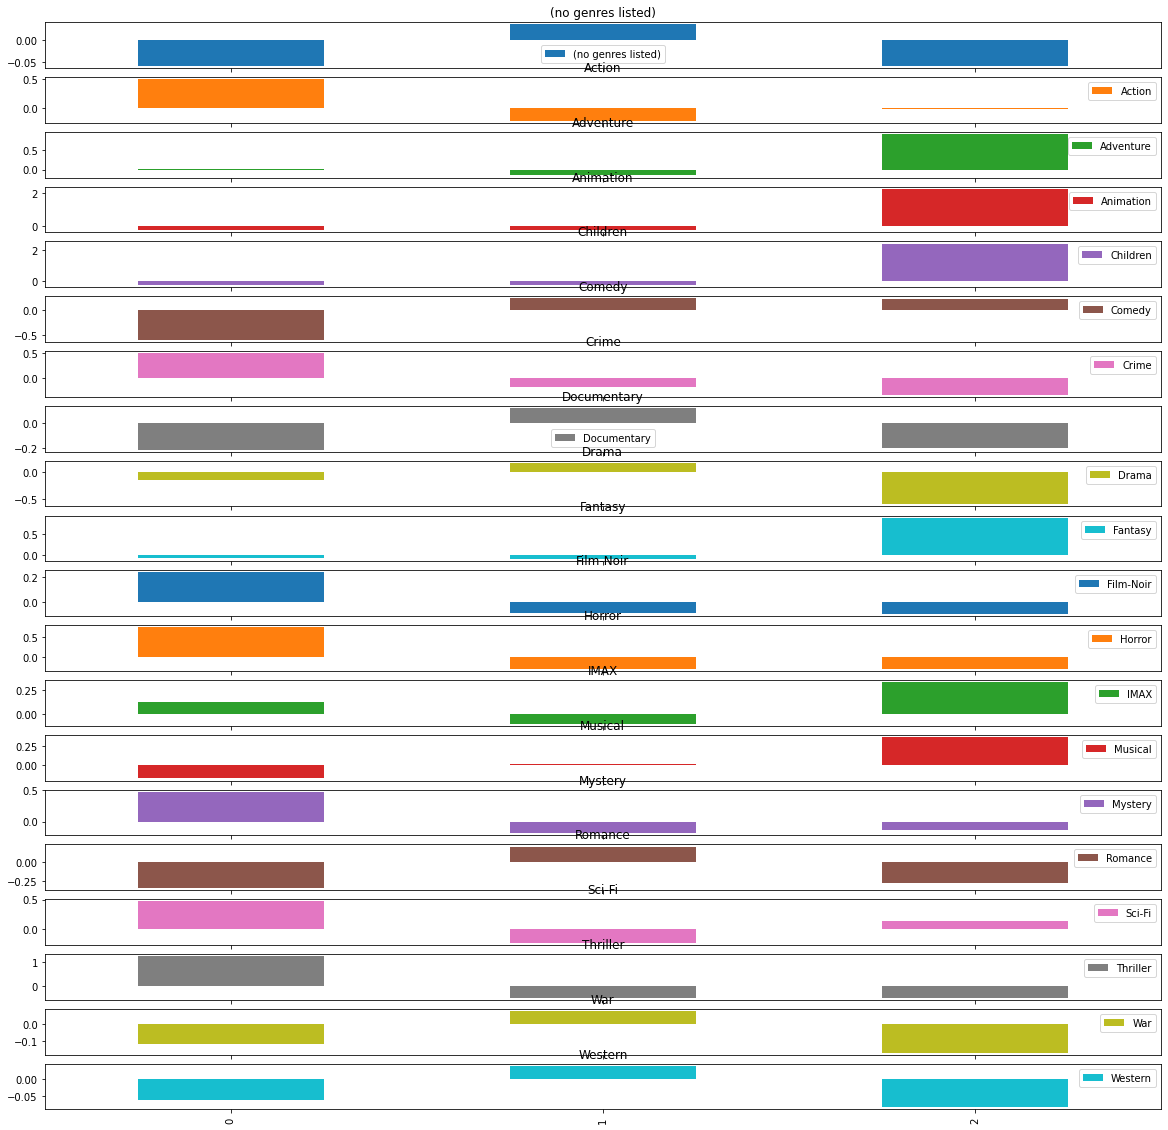

In [14]:
grupos.plot.bar(subplots=True, figsize=(20,20), sharex=False);

In [15]:
grupos.T

,0,1,2
(no genres listed),-0.059180,0.035333,-0.059180
Action,0.503112,-0.219018,-0.009622
Adventure,0.018180,-0.152183,0.908786
Animation,-0.234000,-0.252594,2.238160
Children,-0.267483,-0.270451,2.443185
Comedy,-0.602345,0.230097,0.213925
Crime,0.488230,-0.164052,-0.314885
Documentary,-0.215689,0.126694,-0.202566
Drama,-0.157195,0.162644,-0.590694
Fantasy,-0.079722,-0.108051,0.901124


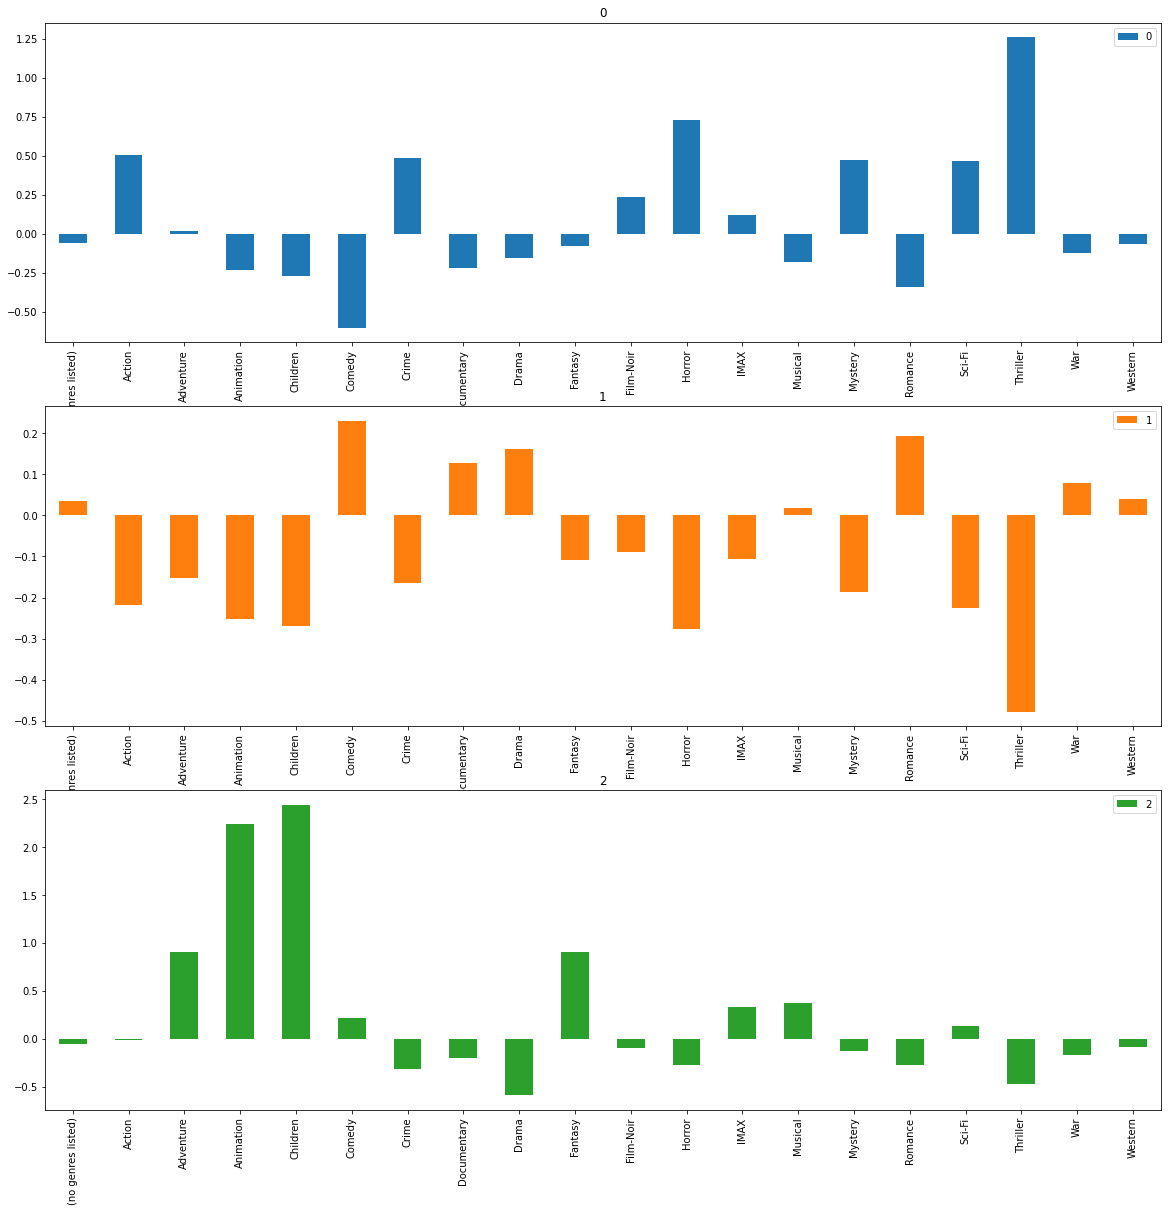

In [16]:
grupos.T.plot.bar(subplots=True, figsize=(20,20), sharex=False);

In [17]:
grupo = 0

filtro = kmeans.labels_ == grupo

filmes[filtro].sample(10)

,Filmes,Titulo,Generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1220,1620,Kiss the Girls (1997),Crime|Drama|Mystery|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
6446,51935,Shooter (2007),Action|Drama|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4619,6882,Returner (Ritaanaa) (2002),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3659,5033,"Russia House, The (1990)",Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2280,3024,Piranha (1978),Horror|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1040,1352,Albino Alligator (1996),Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9110,144734,Freaks of Nature (2015),Comedy|Horror|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2972,3984,Diamonds Are Forever (1971),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3786,5294,Frailty (2001),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1694,2279,Urban Legend (1998),Horror|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


## Reduzir a dimensão para visualizar 


In [18]:
tsne = TSNE()
reducao = tsne.fit_transform(generos_escalados)

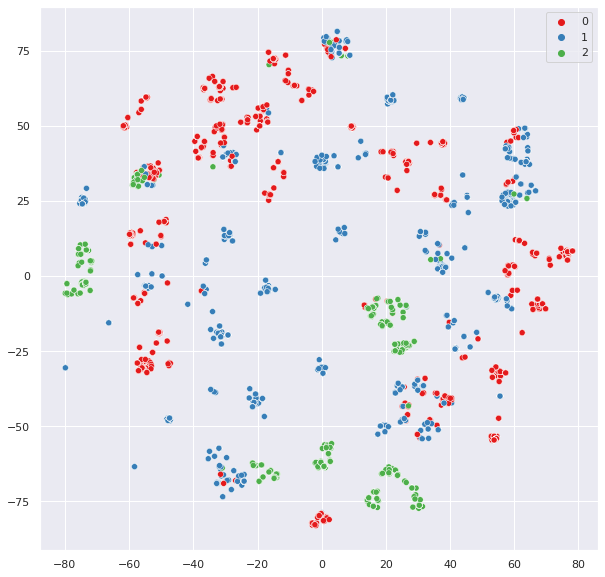

In [19]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x=reducao[:,0], y=reducao[:,1], hue=kmeans.labels_, palette=sns.color_palette('Set1', 3))

## Cluster = 20

In [20]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

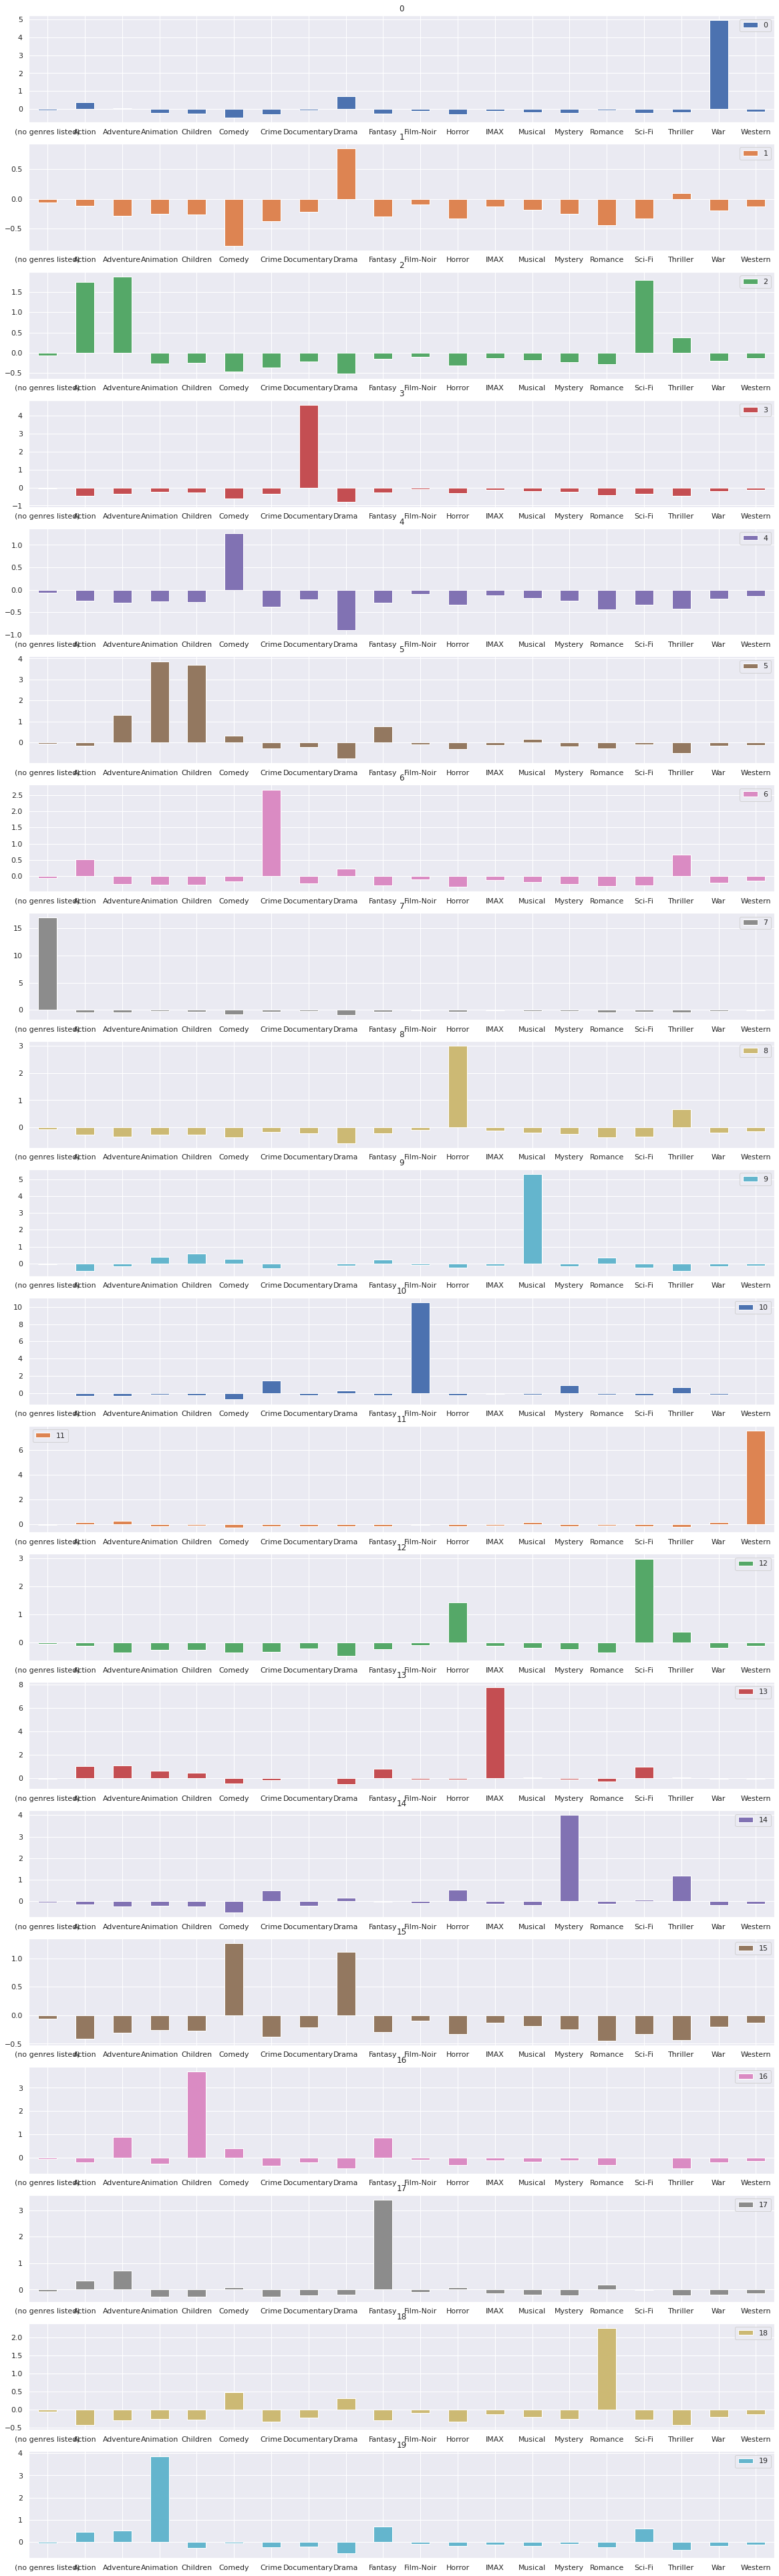

In [21]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.T.plot.bar(subplots=True, figsize=(20,70), sharex=False, rot=0);

In [22]:
grupo = 11
filtro = modelo.labels_ == grupo
filmes[filtro].sample(10)



,Filmes,Titulo,Generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8712,125221,The Beast of Hollow Mountain (1956),Horror|Sci-Fi|Western,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
7457,81681,I Shot Jesse James (1949),Drama|Romance|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
508,590,Dances with Wolves (1990),Adventure|Drama|Western,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
399,458,Geronimo: An American Legend (1993),Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2198,2922,Hang 'Em High (1968),Crime|Drama|Western,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4566,6785,Seven Brides for Seven Brothers (1954),Comedy|Musical|Romance|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2335,3093,McCabe & Mrs. Miller (1971),Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1565,2103,Tall Tale (1995),Adventure|Children|Fantasy|Western,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6037,39435,"Legend of Zorro, The (2005)",Action|Adventure|Drama|Western,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3348,4535,"Man from Snowy River, The (1982)",Drama|Romance|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [23]:
def kmean(cluster, generos):
  modelo = KMeans(n_clusters=cluster)
  modelo.fit(generos)
  return [cluster, modelo.inertia_] #inertia_ = erro 

In [24]:
kmean(20, generos_escalados)

[20, 54194.18640074965]

In [25]:
kmean(3, generos_escalados)

[3, 167962.11871864484]

In [ ]:
resultado = [kmean(i, generos_escalados) for i in range(1,41)]
resultado


In [27]:
df_cluster_erro = pd.DataFrame(resultado, columns=['Grupos', 'Inertia'])

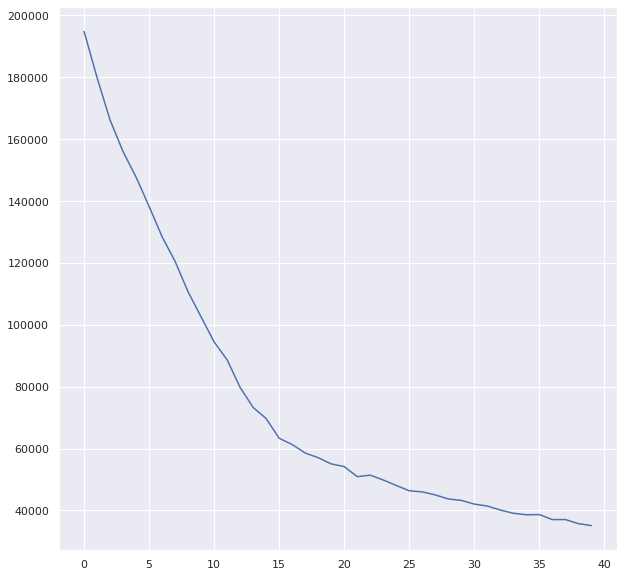

In [28]:
df_cluster_erro.Inertia.plot()

In [29]:
#elbow method 

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

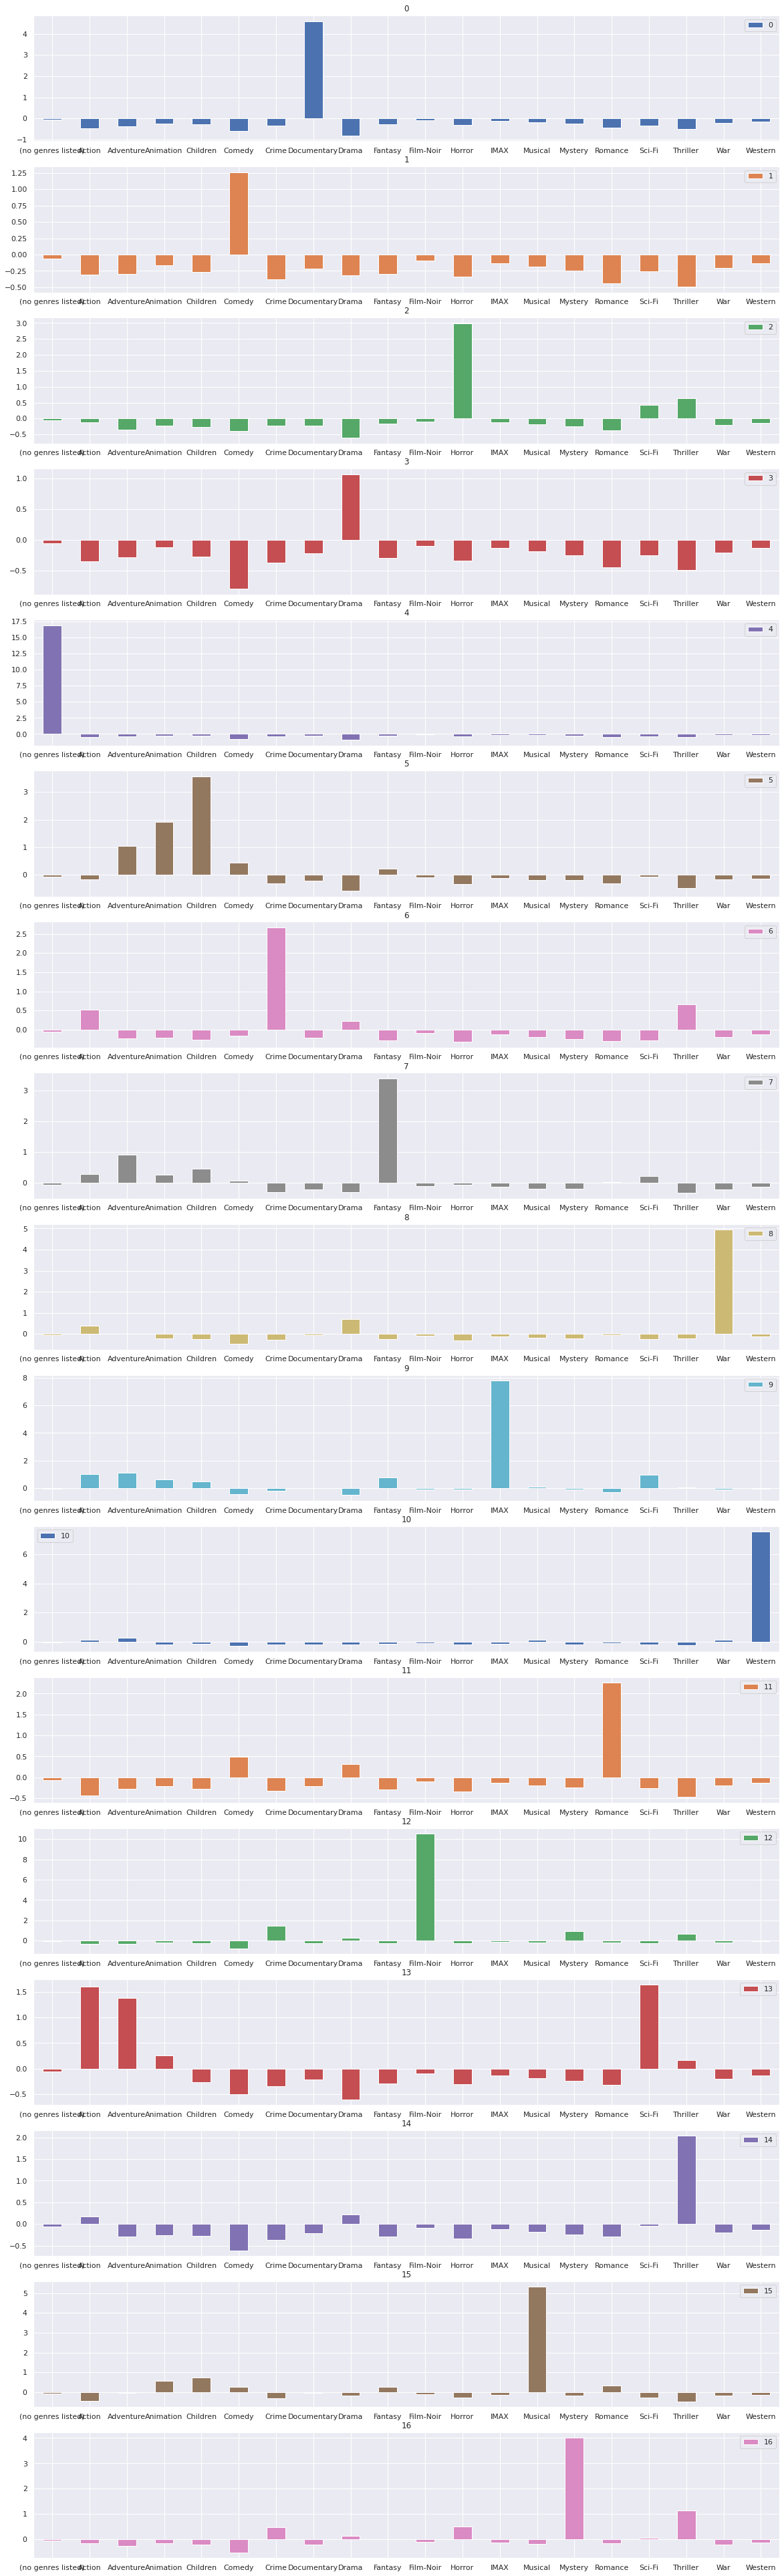

In [30]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.T.plot.bar(subplots=True, figsize=(20,70), sharex=False, rot=0);

In [31]:
grupo = 0
filtro = modelo.labels_ == grupo
filmes[filtro].sample(10)


,Filmes,Titulo,Generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4840,7225,Pumping Iron (1977),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2977,3989,One Day in September (1999),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3612,4961,Pornstar: The Legend of Ron Jeremy (2001),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8412,110669,"Honest Liar, An (2014)",Comedy|Documentary,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1242,1652,Year of the Horse (1997),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5292,8755,My Voyage to Italy (Il mio viaggio in Italia) ...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9443,167064,I Am Not Your Negro (2017),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8854,133115,We Could Be King (2014),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5725,27878,Born into Brothels (2004),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8089,100106,"Pervert's Guide to Ideology, The (2012)",Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
#agrupando de baixo para cima (como se fosse um organograma de baixo para cima)
aglomerativo = AgglomerativeClustering(n_clusters=17)
grupos = aglomerativo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [37]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

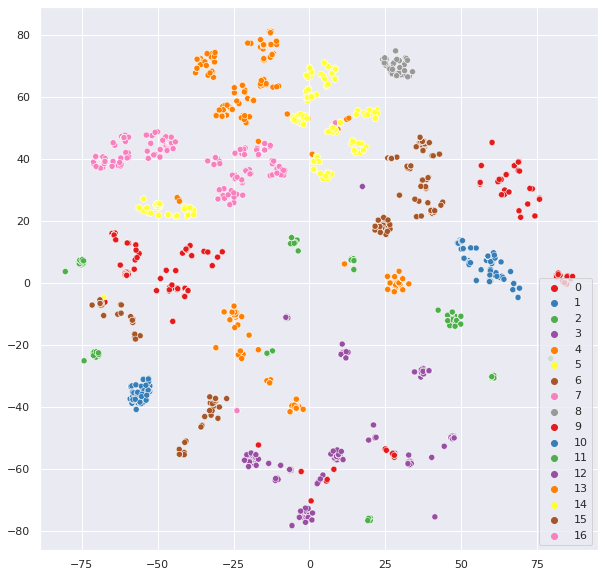

In [39]:
sns.scatterplot(x=visualizacao[:,0] , y=visualizacao[:,1], hue=grupos, palette=sns.color_palette('Set1', 17))

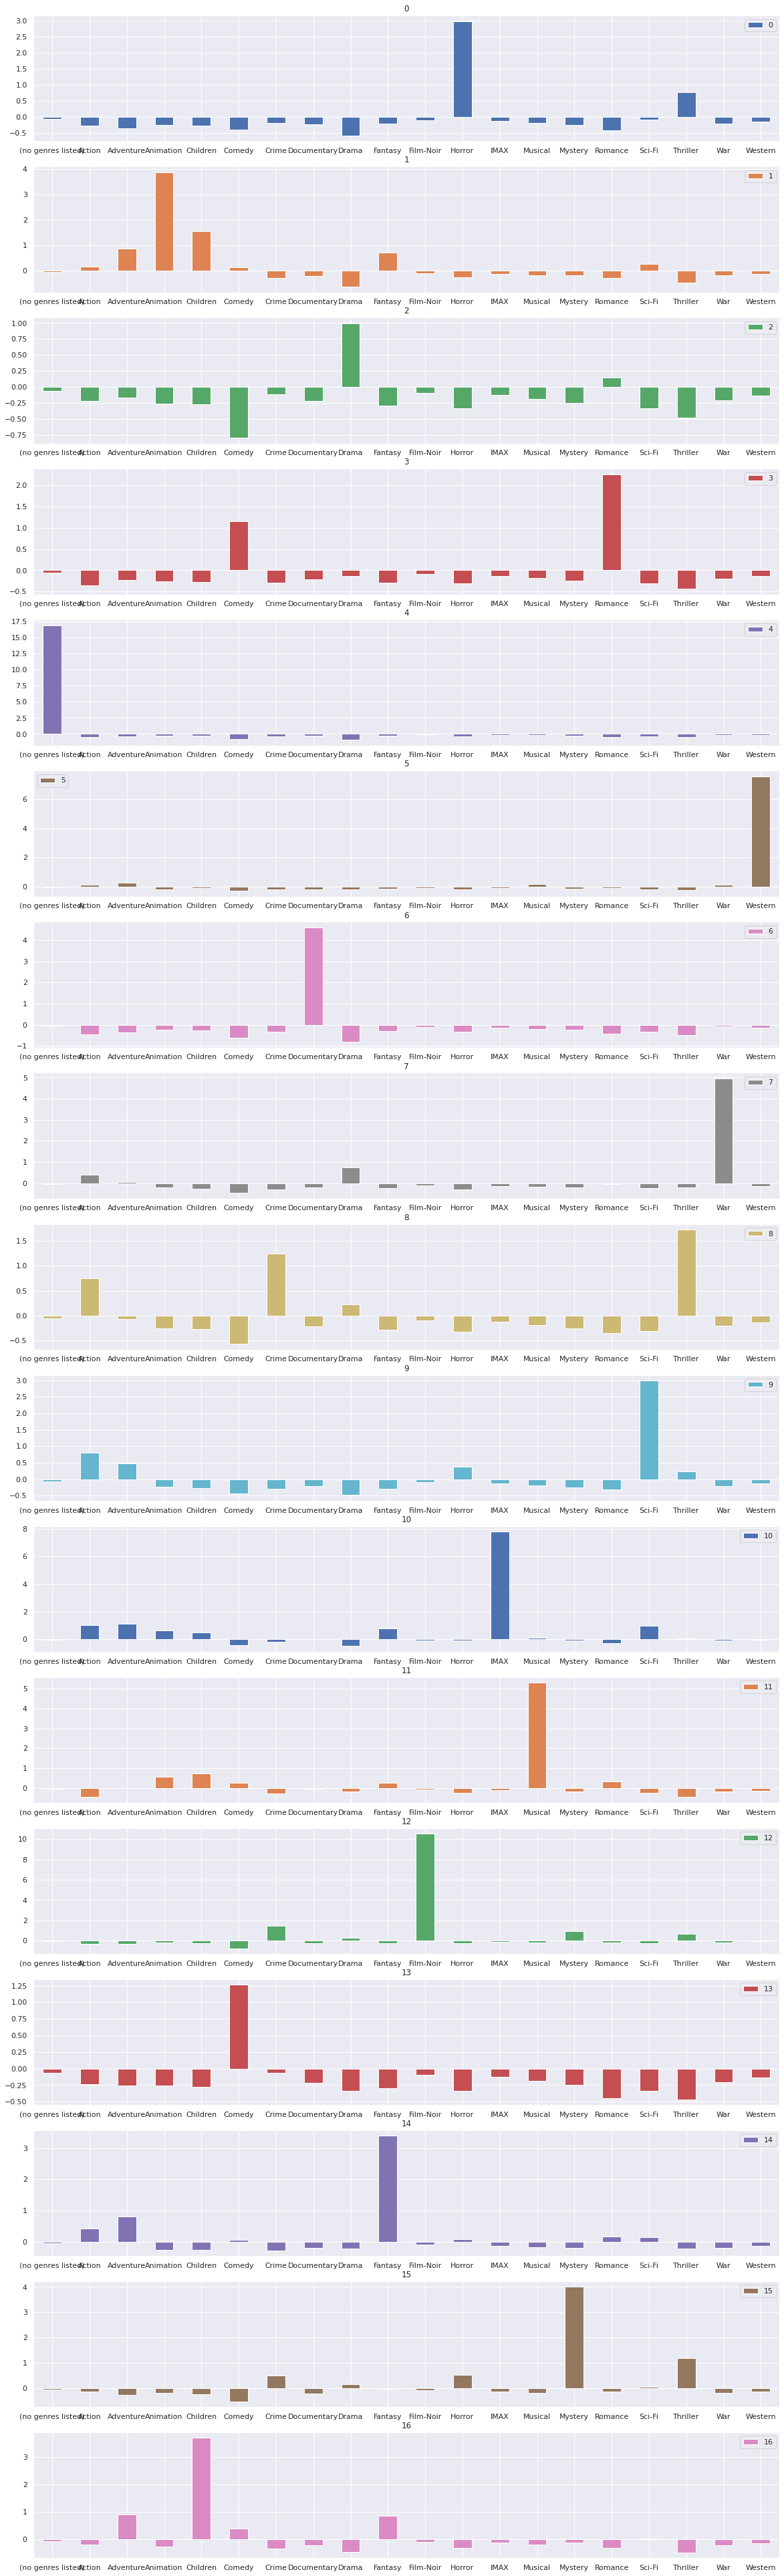

In [41]:
#dendograma
#utilizando o modelo feito para passar para o dendograma
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.T.plot.bar(subplots=True, figsize=(20,70), sharex=False, rot=0);

In [43]:
matrix_distancia = linkage(grupos)
matrix_distancia

array([[ 2.        , 13.        ,  2.5213442 ,  2.        ],
       [ 3.        , 17.        ,  2.7247995 ,  3.        ],
       [ 8.        , 18.        ,  2.92463336,  4.        ],
       [ 0.        , 19.        ,  3.93735709,  5.        ],
       [ 9.        , 20.        ,  4.00953636,  6.        ],
       [14.        , 21.        ,  4.17848528,  7.        ],
       [16.        , 22.        ,  4.40928022,  8.        ],
       [15.        , 23.        ,  4.55927436,  9.        ],
       [ 1.        , 24.        ,  4.68313671, 10.        ],
       [ 6.        , 25.        ,  5.19486108, 11.        ],
       [ 7.        , 26.        ,  5.22508358, 12.        ],
       [11.        , 27.        ,  5.83273355, 13.        ],
       [ 5.        , 28.        ,  7.85585918, 14.        ],
       [10.        , 29.        ,  8.37607549, 15.        ],
       [12.        , 30.        , 10.80670972, 16.        ],
       [ 4.        , 31.        , 17.07838962, 17.        ]])

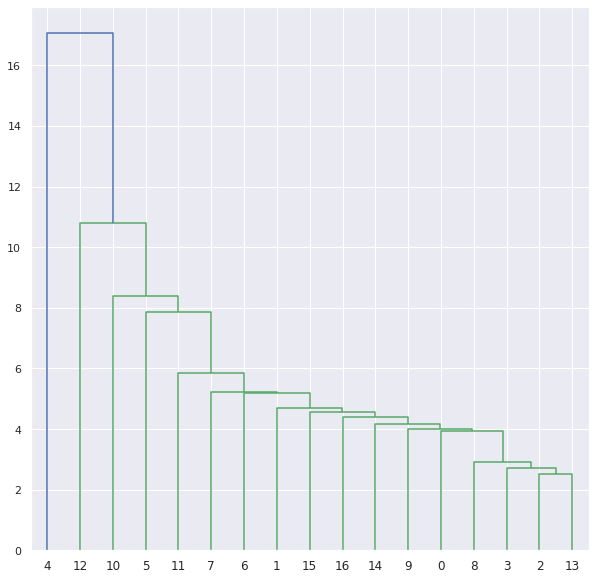

In [44]:
dendograma = dendrogram(matrix_distancia)